In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv(r"C:\Users\chinm\OneDrive\Desktop\Data\bank.csv")
print(df)

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [3]:
df.shape

(11162, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
col_names = ['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']

for col in col_names:
    print(df[col].value_counts())

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
no     10994
yes      168
Name: default, dtype: int64
no     5881
yes    5281
Name: housing, dtype: int64
no     9702
yes    1460
Name: loan, dtype: int64
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64
unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64
no     5873
yes    5289
Name: d

In [7]:
convert={"job":{"management":1,"blue-collar":2,"technician":3,"admin.":4,"services":5,"retired":6,"self-employed":7,"student":8,"unemployed":9,"entrepreneur":10,"housemaid":11,"unknown":12},
         "marital":{"single":0,"married":1,"divorced":2},
    "deposit":{"yes":1,"no":0},
        "poutcome":{"success":1,"failure":0,"other":2,"unknown":3},
        "contact":{"cellular":0,"telephone":1,"unknown":2},
        "loan":{"yes":1,"no":0},
         "pdays":{"-1":0},
         "housing":{"yes":1,"no":0},
         "default":{"yes":1,"no":0},
        "education":{"secondary":1,"primary":0,"tertiary":2,"unknown":3},
        "month":{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
        }

In [8]:
df = df.replace(convert)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,4,1,1,0,2343,1,0,2,5,5,1042,1,-1,0,3,1
1,56,4,1,1,0,45,0,0,2,5,5,1467,1,-1,0,3,1
2,41,3,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
3,55,5,1,1,0,2476,1,0,2,5,5,579,1,-1,0,3,1
4,54,4,1,2,0,184,0,0,2,5,5,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,2,0,0,0,1,1,0,0,20,4,257,1,-1,0,3,0
11158,39,5,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,3,0,1,0,29,0,0,0,19,8,156,2,-1,0,3,0
11160,43,3,1,1,0,0,0,1,0,8,5,9,2,172,5,0,0


In [67]:
x = ['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day','month','duration', 'campaign','pdays','previous','poutcome', 'deposit']
y = ['YES', 'NO']
all_inputs =df[x]
all_classes= df['loan']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_classes, test_size=0.33, random_state = 42)

In [69]:
y_pred_gini = clf_gini.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

print("Model accuracy score with criterian gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterian gini index: 1.0000


In [71]:
print("Training set score:{0:0.4f}".format(clf_gini.score(X_train, y_train )))

print("Testing set score:{0:0.4f}".format(clf_gini.score(X_test, y_test )))

Training set score:1.0000
Testing set score:1.0000


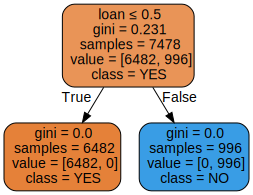

In [63]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=x,
                                class_names=y, filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)

graph